# Introduction of K-Means Clustering 

A cluster refers to a collection of data points aggregated together because of certain similarities.K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

* K refers to the number of centroids you need in the dataset.
* The ‘means’ in the K-means refers to averaging of the data.
* A cluster refers to a collection of data points aggregated together because of certain similarities.

The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

## Algorithm
We start data mining with a first group of randomly selected centroids, which are used as the beginning points for every cluster. Then perform calculations iterativly to optimize the positions of the centroids.

<td>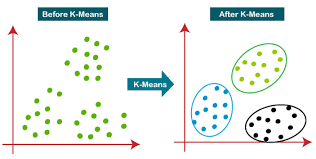

## Clustering VS. Classification

Classification and clustering are two methods to indentify the pattern in machine learning. Both of them are used to categorize objects into one or more classes based on their features. 

>  Classfication: 
  * Used for supervised learning. 
  * Need Labeled data
  * Need training and testing dataset for verifying the model created.  
  * More complex as compared to clustering
  * Ex: Logistic regression, Naive Bayes classifier, Support vector machines, etc. 

> Clustering:
  * Used for unsupervised learning
  * Need unlabeled data
  * No need of training and testing dataset
  * Less complex as compared to classification
  * Ex: K-means clustering algorithm, Fuzzy c-means clustering algorithm, etc.  

<td><img src=https://analystprep.com/study-notes/wp-content/uploads/2021/03/cfa-level-2-classification-vs-clustering.png >

## Library
The following packages will be needed to run the code below:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)


# Dataset

Data is extracted from Kaggle. The data is the customers data from a shopping mall. It included many variables as following: customer ID, gender, age, annual Income, Spending score and education level. The first few data is shown as below:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
df=pd.read_csv('Shoppingmall_data.csv')
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   education  
0          2  
1          1  
2          1  
3          2  
4          1  


Plot the origenal data set use the following code:

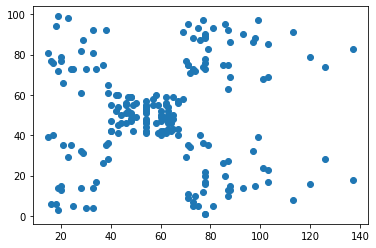

In [ ]:
X = df.iloc[:, [3,4]]
X=X.to_numpy()
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
def initialize_centroids(data, k = 2):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids
def distance(v, w):
    return np.sqrt((v - w) @ (v - w))
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

def fit(data, k = 3, max_interations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
## try to achieve stpe 4 to find the centroids no longer move below:
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_interations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1
        
    return C_new

def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)



## How to determine the number of clusters? 
Calute the mean square error of each points to the centroids. Then plot the MSE. The plot looks like the shape of elbow. We can apply "Elbow" method to select the optimal number of clusters. Before 4 cluster, the curve decrease sharply. After 4 clusters, the curve decreases slowly and smoother. We choose 4 clusers as the number of clusters. 


In [ ]:
k=4
C0 = initialize_centroids(X,k=k)
C1 = new_centroids(X,C0)
C2 = new_centroids(X,C1)
C3 = new_centroids(X,C2)
C4 = new_centroids(X,C3)
C = [C1,C2, C3, C4]
errors = [mse_classes(X, centroids) for centroids in C]
errors

[45144.74925107871, 38883.32602131099, 37413.06258442851, 37007.96967839679]

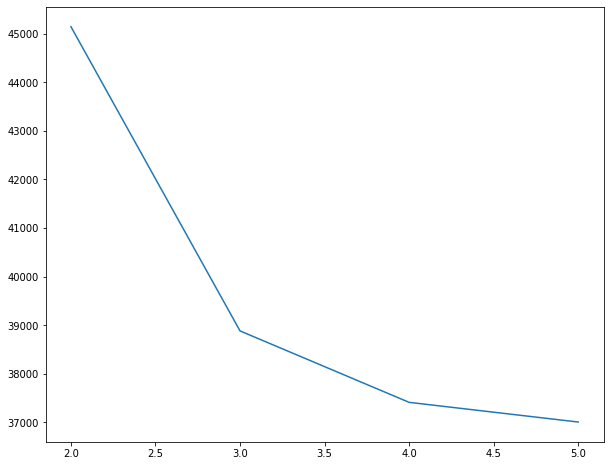

In [ ]:
errors = [mse_classes(X, centroids) for centroids in C]
errors
plt.figure(figsize=(10, 8))
plt.plot([i for i in range(2, 6)], errors)

In [ ]:
k=4
C_old = initialize_centroids(X, k = k)
C_new = new_centroids(X, C0)
[distance(p[0], p[1]) for p in zip(C_old, C_new)]

[50.62144937271721, 49.962238827358156, 56.73247978925784, 18.99863312153066]

## Visualized the clusters 
We finish off by visualizing clusters on a 2D plane. It is a 2D visualization. There are four segments are clearly sparated in four different colors. It looks like can be divided into five groups. So I will try 5 clusters next. 

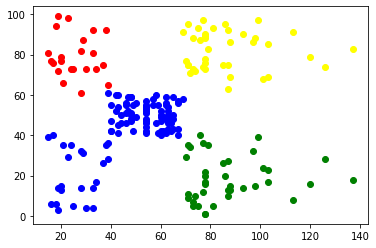

In [ ]:
[p for p in zip(C_old, C_new)]
for x in X:
    if assignment(x, C4) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C4) == 1:
        plt.scatter(x[0], x[1], color = "green")
    elif assignment(x, C4) == 2:
        plt.scatter(x[0], x[1], color = "yellow")
    else:
        plt.scatter(x[0], x[1], color = "red")
        

### Plot with 5 clusters
I try to plot it with 5 clusters. The result exceeded my expectations. It separated the right corner groups, not the left corner. By comparing the plot with 4 and 5 clusters, 4 clusters are better than 5 clusters. 

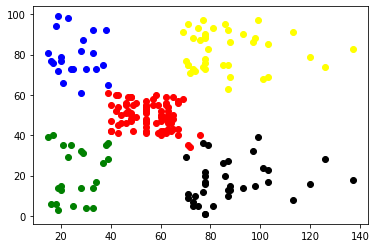

In [ ]:
for x in X:
    if assignment(x, C5) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C5) == 1:
        plt.scatter(x[0], x[1], color = "green")
    elif assignment(x, C5) == 2:
        plt.scatter(x[0], x[1], color = "yellow")
    elif assignment(x, C5) == 3:
        plt.scatter(x[0], x[1], color = "black")
    else:
        plt.scatter(x[0], x[1], color = "red")

# Introduction of PCA
Principal Component Analysis(PCA)is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.For example, in our dataset, there are 5 variables. Obviously it is hard to analyze in 5 dimension, so PCA can help us to reduce the dimension, while preserving as much information as possible. 
## Standardization 
The range of variables is different.We can imagine that two people may differ from age. One may be 19, while another one may be 60. The difference in age is 41 years. However, it spans almost the entire range of possible ages in our dataset. 
At the same time, the first individual may have an Spending Score of 1,000. However, the second individual may have an Spending Score of $5,000. Therefore, the difference between their Spending Score will be 4,000.\
If these numbers were to go into any of our segmentation models as they are, the algorithm would believe that the two differ in terms of one variable by 41,while another by 4,000. Then, due to the mathematical nature of modeling, it would completely disregard ‘Age’ as a feature. The reason is that the numbers from 19 to 41 are insignificant when compared with large Spending Score values. That's the reason we need to standardlize variables. 


In [ ]:
scaler=preprocessing.MinMaxScaler()
df_std=scaler.fit_transform(df.iloc[: , 1:])

## First we fit our standardized data using PCA

In [ ]:
pca=PCA()
pca.fit(df_std)


PCA()

## Second, decide how many features

In [ ]:
pca.explained_variance_ratio_

array([0.4302188 , 0.25775012, 0.15127514, 0.08187495, 0.07888099])

Text(0, 0.5, 'Cumulative Explained Variance')

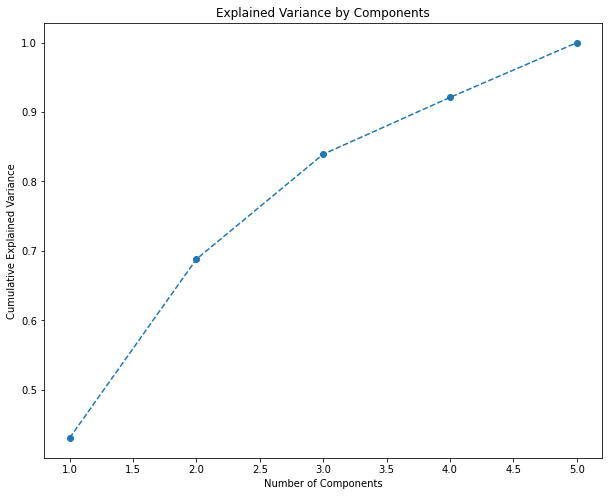

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,6),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

The graph shows the amount of variance(on the y-axis) depending on the number of components(the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.


## Third, perform PCA with the chosen number of components

In [ ]:
#class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10,
#                             max_iter=300, tol=0.0001, verbose=0, random_state=None,
 #                            copy_x=True, algorithm='auto')
    
from sklearn.cluster import KMeans
X_reduced= PCA(n_components=3).fit_transform(df.iloc[: , 1:])

df_segm_pca_kmeans=pd.concat([df.reset_index(drop=True),
                            pd.DataFrame(X_reduced)],axis=1)

df_segm_pca_kmeans.columns.values[-3:]=['Component 1','Component 2','Component 3']

kmeans_pca=KMeans(n_clusters=4,random_state=42).fit(X_reduced)
df_segm_pca_kmeans['Segment K-means PCA']=kmeans_pca.labels_


## Forth, combine PCA and K-means Clustering

Two components were selected and used as axes. The main idea of PCS was to reduce the dimensions and determine the most important components. This way, we can tell that the first two components explain more variance than the third one. In each of the segments, they have similar features. 


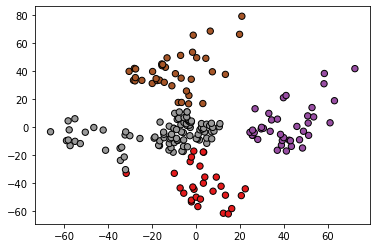

In [ ]:
y=df_segm_pca_kmeans['Segment K-means PCA']
plt.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor='k',
    s=40,
)

## Check it on 5 clusters

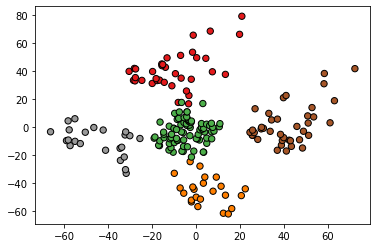

In [2]:
from sklearn.cluster import KMeans
X_reduced= PCA(n_components=3).fit_transform(df.iloc[: , 1:])

df_segm_pca_kmeans=pd.concat([df.reset_index(drop=True),
                            pd.DataFrame(X_reduced)],axis=1)

df_segm_pca_kmeans.columns.values[-3:]=['Component 1','Component 2','Component 3']

kmeans_pca=KMeans(n_clusters=5,random_state=42).fit(X_reduced)
df_segm_pca_kmeans['Segment K-means PCA']=kmeans_pca.labels_
y=df_segm_pca_kmeans['Segment K-means PCA']
plt.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor='k',
    s=40,
)

The plot looks beautiful. The clustering groups reach our expectation. 

# Reference

Saumya Awasthi, Dataaspirant. FIVE MOST POPULAR UNSUPERVISED LEARNING ALGORITHMS.Jan 11,2021. https://dataaspirant.com/unsupervised-learning-algorithms/#t-1610384863259

Pranshu Sharma，Analytics Vidhya.K Means Clustering Simplified in Python. April 26,2021. https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/